In [1]:
import re
from nltk.stem import *
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

file_path = "pg2000.txt"
output_file = "output.txt"

step = 1

terms = {}
tokens = []

steps = []
terms_size = []
tokens_size = []

def translate(to_translate):
    tabin = u'áéíóú'
    tabout = u'aeiou'
    tabin = [ord(char) for char in tabin]
    translate_table = dict(zip(tabin, tabout))
    return to_translate.translate(translate_table)


def remove_non_alphanumeric(result):
    return re.sub(r'[^a-zA-Z0-9]', '', result)

def normalize(token):
    result = token.lower()
    result = translate(result)
    result = remove_non_alphanumeric(result)
    return result

with open(file_path, "r") as f:
    for line in f.readlines():
        for word in line.strip().split():
            possible_term = normalize(word)
            tokens.append(possible_term)
            try:
                terms[possible_term] += 1
            except:
                terms[possible_term] = 1

            steps.append(step)
            step += 1
            tokens_size.append(len(tokens))
            terms_size.append(len(terms))


In [2]:
with open(output_file, "w") as f:
    f.write("{} {}".format(len(tokens), len(terms)))

In [3]:
from scipy.optimize import curve_fit

def func(n, k, b):
    return k*(n**b)

popt, pcov = curve_fit(func, steps, terms_size)
y_pred = func(steps, *popt)



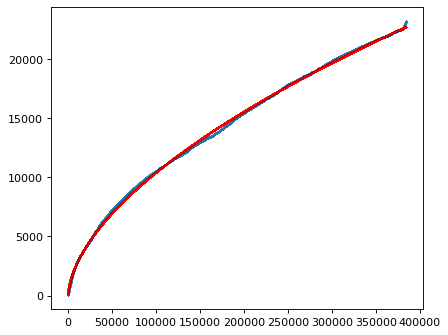

In [4]:
figure(figsize=(6, 5), dpi=80)
plt.scatter(steps, terms_size, s=0.0005)
plt.scatter(steps, y_pred, color="red", s=0.0005)
plt.show()

In [5]:
pow(np.corrcoef(terms_size, y_pred)[0][1], 2)

0.9991489082769771